# Utilisation des terres de chaque région source pour répondre à la consommation finale des régions réceptrices entre 1995 et 2022.

Nous voulons dans cette partie examiner la répartition des terres utilisées par une région source pour la production, en faisant la différence entre la part utilisée pour sa propre consommation finale et celle utilisée pour répondre à la consommation finale des régions réceptrices.

Cela permet de mettre en avant la proportion des terres utilisées par une région source qui est consacrée à la production exportée pour répondre aux besoins des autres régions. De plus, cela nous aide à identifier la proportion des terres utilisées par cette région source qui est destinée à sa propre consommation finale, sans être exportée.

In [2]:
#importations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.colors import LogNorm
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter
import imageio

Nous avons utilisé les bases de données en format CSV que nous avons obtenu lors du nettoyage des bases de données d'EXIOBASE3 entre 1995 et 2022 afin d'obtenir les DataFrames correspondant aux niveaux d'utilisations des terres par chaque région et destinés à la consommation finale que vous pouvez retrouver ici (mettre le lien).

Pour déterminer la répartition des terres utilisées par une région source pour répondre à sa propre consommation finale, mais également aux autres régions réceptrices, nous avons normalisé nos [DataFrames](https://github.com/MarDrd/exiobase3-manipulation/tree/main/Impact%20-%20Consommation%20Finale/LandUse%20-%20Consommation%20Finale/LandUse%20-%20Data) en suivant ces étapes :
1. Calculer la somme de chacune de nos lignes, qui correspondent toutes à une région source, c'est-à-dire qui exploite ces terres internes.
2. Diviser chaque valeur de la ligne par la somme de cette même ligne, c'est-à-dire par la valeur obtenue à l'étape precedente.



In [3]:
#Fonction pour charger les bases de données cvs pour chaque année
def load(year):
    #Charger les bases de données csv
    df = pd.read_csv(f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Data\df_LandUse_{year}.csv')

    #Changer l'ordre des régions pour les lignes et les colonnes
    order = ["Japon", "Inde", "Chine", "Indonésie", "Afrique", "Union européenne", "Etats-Unis", "Mexique", "Brésil",
              "Amerique Latine et Caraïbes", "Moyen-Orient", "Russie", "Europe","Asie Pacifique", "Canada", "Australie"]
    df = pd.DataFrame(df, index=order)
    df = df[order]

    #Résultat de la fonction 'load'
    return df

#Dictionnaire vide pour stocker les DataFrame de la loop
data = {}

#Loop pour chaque année entre 1995 et 2022
for year in range(1995, 2023):

    #Charger les données pour une des années
    df_year = load(year)
    
    #Calculer la somme de chaque ligne de la DataFrame pour cette année
    df_year_imp = df_year.sum(axis=1)
    
    #Division de chaque éléments des lignes par la somme obtenue précedemment et mettre en pourcentage
    df_year_normalized = df_year.div(df_year_imp, axis=0) * 100
    
    #Stocker la DataFrame dans le dictionnaire
    data[year] = df_year_normalized


#Boucle pour créer une heatmap pour chaque année
for year, df_normalized in data.items():

    #Création d'astériques
    regions_ast = ["Japon", "Inde", "Chine", "Indonésie", "Afrique$^{1}$", "Union\neuropéenne$^{2}$", "Etats-Unis", "Mexique", "Brésil",
              "Amerique Latine\net Caraïbes$^{3}$", "Moyen-Orient$^{4}$", "Russie", "Europe$^{5}$","Asie Pacifique$^{6}$", "Canada", "Australie"    ]
    
    #Ajouter les astériques pour les lignes et les colonnes
    df_normalized.columns = regions_ast
    df_normalized.index = regions_ast

    #Label des lignes et colonnes
    df_normalized.columns.name = "Région réceptrice d'utilisation des terres"
    df_normalized.index.name = "Région source d'utilisation des terres"
    
    #Taille de la figure
    plt.figure(figsize=(30, 15))
    
    #Création d'une carte thermique des DataFrames
    sns.heatmap(df_normalized, norm=LogNorm(vmin=0.8, vmax=97),
            annot=True, fmt='.2f', cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) des régions sources (%)",
                      "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

    #Titre de la carte thermique
    plt.title(f"Utilisation des terres de chaque région source pour répondre à la consommation finale des régions réceptrices en {year}", fontsize=14, fontweight='bold', y=-0.09)
    
    #Permet d'ajuster la positions des éléments de la carte thermique
    plt.subplots_adjust(bottom=0.3)
    
    #Création des notes en bas de pages associées aux astériques
    plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
    plt.figtext(0.05, 0.06, "$^{2}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
    plt.figtext(0.05, 0.05, "$^{3}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)    
    plt.figtext(0.05, 0.04, "$^{4}$ Moyen-Orient hors Turquie.", fontsize=10)
    plt.figtext(0.05, 0.03, "$^{5}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
    plt.figtext(0.05, 0.02, '$^{6}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie', fontsize=10)

    #Ajuster l'espacements des éléments de la carte thermique
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
    #Sauvegarder la carte de thermique
    frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Exportation\df_Exp_{year}.png'
    plt.savefig(frame_filename, bbox_inches='tight')
    
    # #Pour fermer la carte thermique
    plt.close()


In [4]:
#Initialisation : liste vide pour stocker les images créées
images = []

#Création d'une boucle pour chaque année du dictionnaire 'data'
for year in data.keys():
    frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Exportation\df_Exp_{year}.png'
    #Charge l'image et l'ajoute à la liste 'images'
    images.append(imageio.imread(frame_filename))

#Nom du fichier GIF
gif_filename = 'LandUse_FinalConso_Exp_Heatmap.gif'

#Création du GIF
imageio.mimsave(gif_filename, images, duration=1000, loop=0)

C:\Users\Marie\AppData\Local\Temp\ipykernel_40432\1463879148.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_filename))


Nous pouvons facilement observer grâce à la carte thermique que des régions telles que le Japon, la Chine et l'Inde ont utilisé environ 90% de leurs terres internes pour répondre à leur propre consommation finale entre 1995 et 2022. Cela signifie que ces trois régions exportent une proportion très faible de leur production issue de l'exploitation de leurs terres vers d'autres régions.

En 1995, la Russie utilisait également 93% de ses terres internes pour sa propre consommation finale. Toutefois, cette tendance a évolué au fil du temps, et en 2022, elle n'utilisait que 57% de ses terres internes pour répondre à sa consommation finale, indiquant une ouverture aux exportations de produits issus de l'exploitation des terres comme l'agriculture ou la production de bois. Cela représente une diminution de 36 points de pourcentage sur 28 ans.

En 1995, nous observons également que quatre régions utilisaient principalement leurs terres locales pour les exportations : l'Indonésie, l'Asie-Pacifique, le Canada et l'Australie.

Par exemple, en 1995, l'Indonésie exportait 20% de ses terres locales à trvaers sa production vers le Japon et 24% vers l'Asie-Pacifique, utilisant seulement 35% de ses terres locales pour sa propre consommation finale. Cependant, au fil du temps, l'Indonésie a réduit ses exportations de produits issus de l'utilisation de ses terres locales. En 2022, elle consacrait 86% de ses terres locales à sa propre consommation finale, une augmentation de 51 points de pourcentage, avec seulement 0.21% exporté vers le Japon et 3% vers l'Asie-Pacifique.

En revanche, l'Australie, qui utilisait 69% de ses terres internes pour sa propre consommation finale en 1995, exportait seulement 11% vers le Japon et 10% vers l'Asie-Pacifique. Cette proportion a fortement diminué à partir de 2012, atteignant seulement 31% en 2022 pour sa propre consommation finale, avec 8% exporté vers le Japon et 22% vers la Chine.

Ces observations mettent également en lumière que certaines régions sources exportaient une grande partie de leur production issue de l'exploitation des terres vers le Japon, les États-Unis et l'Union européenne en 1995. Bien que cette tendance se soit confirmée pour les États-Unis et l'Union européenne au fil du temps, ce n'est pas le cas pour le Japon, où les régions sources exportent moins de produits issus de l'utilisation de leurs terres internes. Cependant, à partir de 2005, nous observons que certaines régions sources ont exporté une part importante de leurs terres utilisées lors de la production vers la Chine. Par exemple, en 2022, l'Australie a utilisé 22% de ses terres locales pour la production destinée à la consommation finale de la Chine, il en est de même pour l'Asie Pacifique à hauteur de 24% de ces terres locales et 14% pour la Russie.

Pour résumé, des régions telles que le Japon, la Chine et l'Inde maintiennent une utilisation très élevée de leurs terres internes pour leur propre consommation finale et limitent leurs exportations de produits issus de l'exploitation des terres. En revanche, la Russie a considérablement ouvert ses portes aux exportations, passant d'une utilisation majoritairement domestique de ses terres en 1995 à une utilisation plus diversifiée en 2022.

De plus, des changements notables dans les stratégies d'exportation sont observés dans des régions comme l'Indonésie et l'Australie. Par exemple, l'Indonésie a réduit ses exportations de produits agricoles et forestiers au profit d'une forte consommation  intérieure, tandis que l'Australie a vu sa part d'exportations vers la Chine augmenter fortement au détriment de sa propre consommation finale.


#### Évaluer l'exportation virtuelle des terres utilisées par les régions sources vers les régions réceptrices.

Dans cette partie, nous voulons avoir un meilleur apreçu de comment les régions sources utilisent leurs terres pour satisfaire leur propre consommation ou pour exporter vers d'autres régions au fil du temps, entre 1995 et 2022. Pour cela, nous avons extrait les valeurs de la diagonale de la carte thermique de chaque région. Ces valeurs représentent la proportion d'utilisation des terres locales par la région source pour répondre à sa propre consommation finale. Une couleur rouge vif indique que la région utilise principalement ses terres pour sa propre consommation, tandis qu'une couleur froide indique que la région exporte une grande partie de sa production agricole ou forestière vers d'autres régions.

In [5]:
#Création de la fonction 'load'
def load(year):
    #Charger les bases de données csv pour chaque année
    df = pd.read_csv(f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Data\df_LandUse_{year}.csv')
    #Liste définissant l'ordre des régions
    order = ["Japon", "Inde", "Chine", "Indonésie", "Afrique", "Union européenne", "Etats-Unis", "Mexique", "Brésil",
              "Amerique Latine et Caraïbes", "Moyen-Orient", "Russie", "Europe","Asie Pacifique", "Canada", "Australie"]

    #Calculer la somme de chaque colonne de la DataFrame pour cette année         
    df_year_imp = df.sum(axis=1)
    
    #Division de chaque éléments des colonnes par la somme obtenue précedemment et mettre en pourcentage
    df_year_normalized = df.div(df_year_imp, axis=0) * 100

    #Changer l'odre des régions qui pour les lignes et les colonnes avec la liste 'order'
    df1 = pd.DataFrame(df_year_normalized, index=order)
    df1 = df1[order]
    
    #Extraire les valeurs de la diagonale
    diagonal_val = df1.values.diagonal()
    
    #Création d'une DataFrame avec les valeurs de la diagonale
    df_diag = pd.DataFrame(diagonal_val, index=order, columns=[f'{year}'])
    
    #Résultat de la fonction 'load'
    return df_diag

In [6]:
#Initialisation avec une liste vide
diagonals_list = []

#Boucle pour extraire les diagonales pour chaque années et en faire une DataFrame
for year in range(1995, 2023):
    df_diag = load(year)
    diagonals_list.append(df_diag)

#Merge toutes les DataFrame ensemble
df_all_diagonals = pd.concat(diagonals_list, axis=1)

#Afficher la DataFrame
df_all_diagonals

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Japon,98.584741,98.422846,98.107438,97.917890,97.805437,97.989422,97.776656,97.547878,97.560373,97.288943,...,96.852478,96.638356,96.274246,95.856747,95.377468,94.644143,94.845705,94.809418,95.497786,95.250551
Inde,96.711861,92.543619,92.448149,92.314494,92.597367,92.084279,90.756078,91.625173,91.844137,89.782123,...,85.849898,88.833427,89.445996,91.207760,91.132913,90.949130,91.501486,91.720704,92.073735,92.001646
Chine,91.908551,94.219438,90.650529,90.185557,92.412709,89.679610,89.730520,88.513263,86.165881,83.016954,...,83.457258,82.943105,84.167173,84.592366,85.797696,85.462715,85.870163,85.958315,86.254401,87.423685
Indonésie,34.924042,41.511209,30.703477,16.280017,46.421129,53.278419,50.136024,59.480809,63.593022,65.488120,...,82.346500,83.408219,85.366970,86.371250,83.368055,83.834528,85.698809,85.666021,86.184184,86.361439
Afrique,80.821350,78.569593,80.315673,82.852606,80.932525,77.947622,80.258807,81.924350,83.374206,82.593558,...,81.320935,81.660984,84.057689,84.620844,81.751670,80.972625,81.875121,80.876253,81.472268,80.759574
Union européenne,87.575618,87.489352,85.555820,86.282093,85.489983,84.862666,85.429947,85.432808,86.390131,86.241343,...,79.069524,78.745978,78.032543,78.543012,77.717234,77.041405,76.266735,75.680891,75.804317,75.782357
Etats-Unis,78.155157,76.238896,75.605200,79.934837,78.152271,79.635004,81.544408,81.872285,81.442103,83.907242,...,72.047359,72.689862,73.362568,73.644404,72.986769,74.001392,73.275243,73.883244,74.354675,74.610202
Mexique,92.704570,88.991941,88.860737,88.645434,87.946199,86.975396,87.815467,88.883986,87.211071,85.661933,...,81.432167,77.319273,72.533446,72.343318,71.446185,68.588319,67.246602,66.357794,66.066785,68.883330
Brésil,92.116241,91.203447,91.869490,91.165969,87.889627,87.331605,82.891606,80.076620,79.361642,76.335452,...,77.416009,79.322884,71.595067,72.425761,70.909005,66.314896,67.439163,67.204483,67.030121,67.345639
Amerique Latine et Caraïbes,74.774904,72.550460,74.504503,74.104419,73.964161,74.898097,75.862774,69.552951,67.752146,65.917957,...,71.261999,71.212923,70.326136,69.106741,68.288475,66.652085,65.697597,64.437798,64.001721,63.228849


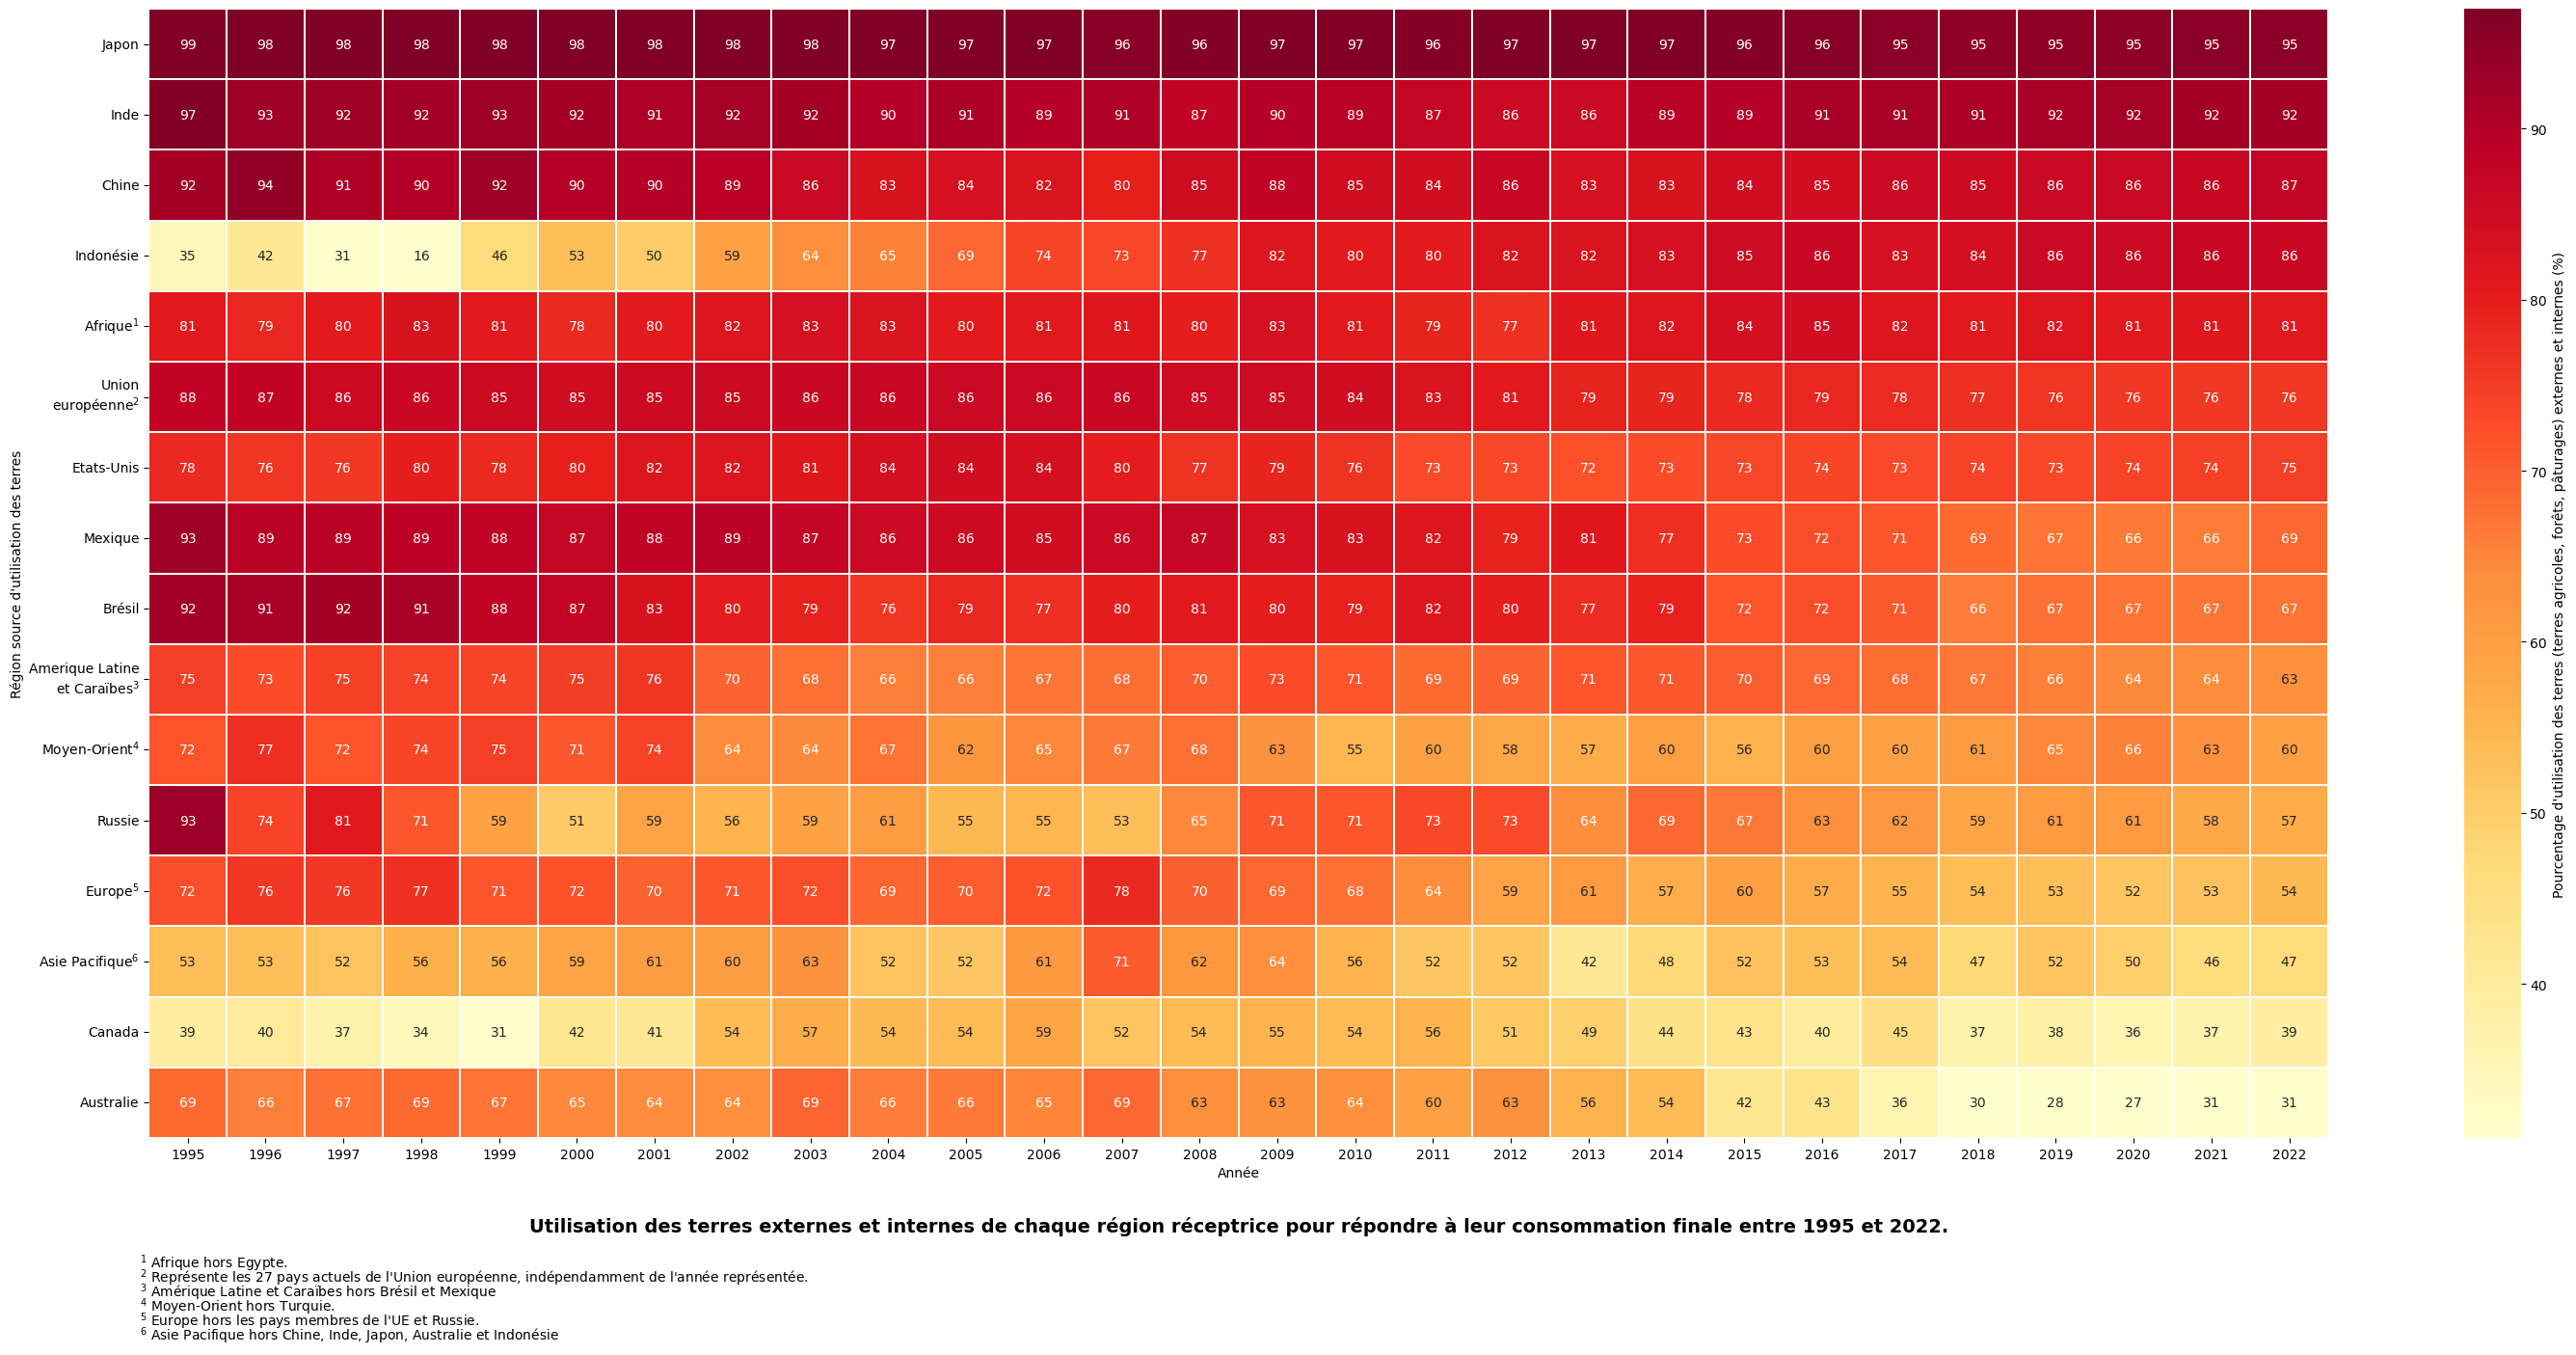

In [18]:
#Création des astériques
regions_ast = ["Japon", "Inde", "Chine", "Indonésie", "Afrique$^{1}$", "Union\neuropéenne$^{2}$", "Etats-Unis", "Mexique", "Brésil",
              "Amerique Latine\net Caraïbes$^{3}$", "Moyen-Orient$^{4}$", "Russie", "Europe$^{5}$","Asie Pacifique$^{6}$", "Canada", "Australie"] 

#Modifier le noms des régions des lignes avec la liste 'region_ast'
df_all_diagonals.index = regions_ast

#Donner un noms aux colonnes et aux lignes
df_all_diagonals.columns.name = "Année"
df_all_diagonals.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(30, 15))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df_all_diagonals, vmin=31, vmax=97,
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice pour répondre à leur consommation finale entre 1995 et 2022.", fontsize=14, fontweight='bold', y=-0.09)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.05, 0.07, '$^{1}$ Afrique hors Egypte.', fontsize=10)
plt.figtext(0.05, 0.06, "$^{2}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
plt.figtext(0.05, 0.05, "$^{3}$ Amérique Latine et Caraïbes hors Brésil et Mexique", fontsize=10)    
plt.figtext(0.05, 0.04, "$^{4}$ Moyen-Orient hors Turquie.", fontsize=10)
plt.figtext(0.05, 0.03, "$^{5}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.05, 0.02, '$^{6}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie', fontsize=10)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Exportation\df_Exp_All.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


Afin de visualiser plus facilement cette évolution, nous avons décidé de créer une carte thermique, qui met en avant facilement la part des terres locales qui sont utilisé pour la consommation de cette même région source. En effet, une couleur rouge vif indique que la région utilise principalement ses terres pour sa propre consommation, tandis qu'une couleur froide indique que la région exporte une grande partie de sa production agricole ou forestière vers d'autres régions.

In [8]:
#Création d'une nouvelle DataFrame avec les régions qui nous intéressent
index = ["Indonésie", "Mexique", "Brésil", "Russie", "Moyen-Orient", "Europe", "Asie Pacifique", "Canada", "Australie"]
df1 = df_all_diagonals.loc[index]
df1

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Indonésie,34.924042,41.511209,30.703477,16.280017,46.421129,53.278419,50.136024,59.480809,63.593022,65.488120,...,82.346500,83.408219,85.366970,86.371250,83.368055,83.834528,85.698809,85.666021,86.184184,86.361439
Mexique,92.704570,88.991941,88.860737,88.645434,87.946199,86.975396,87.815467,88.883986,87.211071,85.661933,...,81.432167,77.319273,72.533446,72.343318,71.446185,68.588319,67.246602,66.357794,66.066785,68.883330
Brésil,92.116241,91.203447,91.869490,91.165969,87.889627,87.331605,82.891606,80.076620,79.361642,76.335452,...,77.416009,79.322884,71.595067,72.425761,70.909005,66.314896,67.439163,67.204483,67.030121,67.345639
Russie,93.008288,73.946583,81.236148,70.966011,59.235697,50.770168,58.990787,55.530866,59.159860,60.803551,...,63.832104,68.772998,66.628509,63.405405,61.983091,58.578163,61.142454,60.925677,57.944932,57.092530
Moyen-Orient,71.641476,77.230857,71.643265,73.748088,74.590756,71.190677,74.214562,64.059521,64.436808,67.114702,...,57.076293,60.004428,55.756739,60.017558,59.555225,60.917809,64.619547,65.528717,63.114325,59.522241
Europe,72.489088,76.056161,75.842660,77.011346,71.300060,71.939920,69.921995,71.211125,72.367516,69.248687,...,60.940732,56.835794,59.959654,57.039235,55.295794,53.551564,53.361965,51.718443,52.574069,54.292096
Asie Pacifique,53.356742,53.404944,52.382770,56.199941,56.185044,59.075553,60.592653,60.343556,62.814415,52.212506,...,41.931435,47.623215,52.473953,53.145219,53.700114,47.441552,51.816116,49.763829,45.800084,46.650168
Canada,39.156120,40.351257,37.093848,34.317005,31.287236,42.252492,41.357113,53.906929,57.163181,54.289943,...,49.346715,43.836185,43.497481,39.817926,45.428585,36.953755,38.006837,36.055098,36.985396,38.748327
Australie,68.558236,65.978203,67.415431,68.639840,67.157334,64.571350,64.020414,63.733514,69.396203,66.186601,...,55.917078,53.740713,42.094338,42.968113,35.966476,29.939545,27.636375,27.046835,30.895255,30.711245


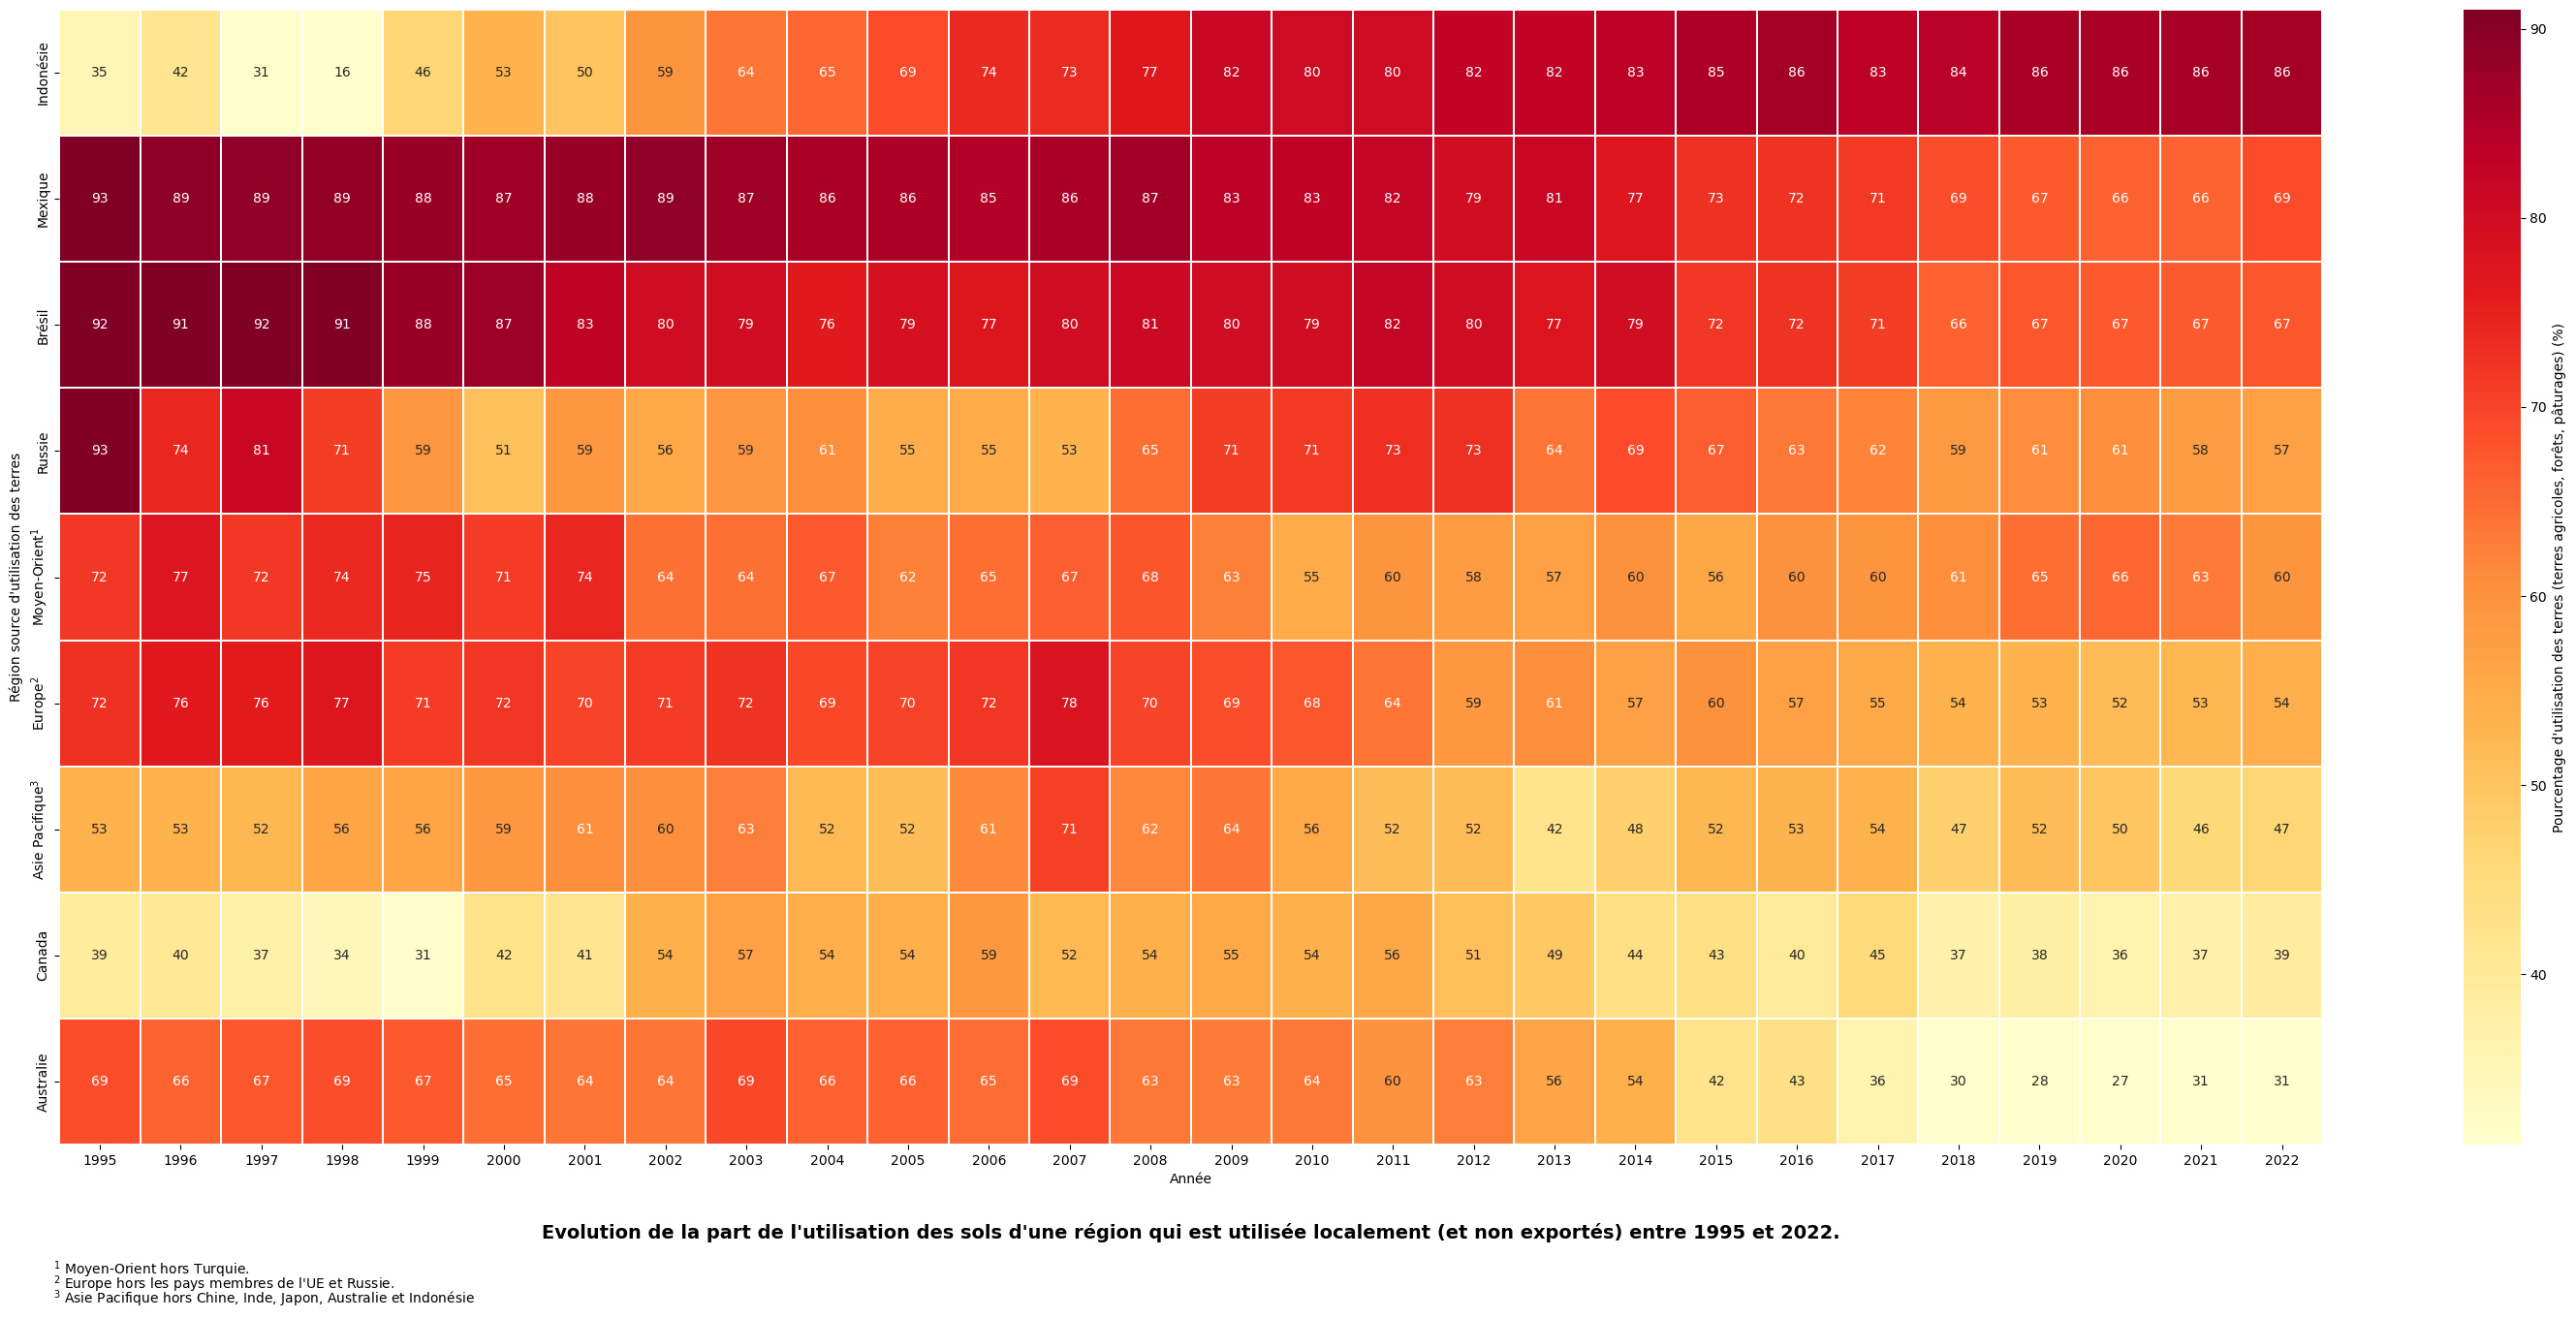

In [9]:
#Création des astériques
regions_ast = ["Indonésie", "Mexique", "Brésil", "Russie", "Moyen-Orient$^{1}$", "Europe$^{2}$", "Asie Pacifique$^{3}$", "Canada", "Australie"]

#Modifier le noms des régions des lignes avec la liste 'region_ast'
df1.index = regions_ast

#Donner un noms aux colonnes et aux lignes
df1.columns.name = "Année"
df1.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(30, 15))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(df1, vmin=31, vmax=91,
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) (%)",
                       "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Evolution de la part de l'utilisation des sols d'une région qui est utilisée localement (et non exportés) entre 1995 et 2022.", fontsize=14, fontweight='bold', y=-0.09)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.02, 0.07, '$^{1}$ Moyen-Orient hors Turquie.', fontsize=10)
plt.figtext(0.02, 0.06, "$^{2}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
plt.figtext(0.02, 0.05, "$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie", fontsize=10)    

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_AllSectors\LandUse - Heatmap\LandUse_Exportation\df_Exp_Sorted.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()

Nous avons sélectionné sur cette carte thermique les régions où la part des terres locales utilisées pour répondre à la consommation locale n'est pas stable au fil du temps. Nous observons que des régions telles que le Mexique, le Brésil, la Russie, le Moyen-Orient, l'Europe, l'Asie-Pacifique et l'Australie ont significativement réduit la proportion de leurs terres utilisées pour la production destinée à la consommation locale. Cela signifie que ces régions ont augmenté leur exportation de produits agricoles et forestiers, marquant ainsi un changement stratégique vers l'exportation.

En revanche, l'Indonésie a adopté une approche différente en réduisant considérablement ses exportations et en utilisant désormais la majorité de ses terres pour produire des biens destinés uniquement à la consommation nationale.